In [102]:
import pandas as pd
import numpy as np
import re
import glob
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

In [103]:
data = pd.read_csv('../results/edges.csv',index_col=0)

In [104]:
# add data from random graphs
add_data = {'n_edges':[],'std_edges':[],'params':[],'type':[]}
files = glob.glob('/home/lau/GIT/FRC_Thesis/results/random_graphs_sizes/*.txt')
for f in files:
    edge_list = np.loadtxt(f)
    add_data['n_edges'].append(np.average(edge_list))
    add_data['std_edges'].append(np.std(edge_list))
    params = re.split('/',f)[-1]
    add_data['params'].append(params[:-4])
    add_data['type'].append('XREF')
add = pd.DataFrame(add_data)
data = data.append(add)#,ignore_index = True

In [105]:

# create collumn expected number of edges\
def to_expected(string):
    x = string.split("_")
    numbers = '[-+]?\d*\.\d+|\d+'
    ints = [float(re.findall(numbers,i)[0]) for i in x]
    return ints[0]/ints[1]

data['Expected Edges'] = data.params.apply(to_expected)
data['Edges'] = data['n_edges']
data = data.drop('params',axis = 1)
data = data.drop('n_edges',axis = 1)
# data.drop('Unnamed: 0')

In [106]:
data = data.groupby(['type','Expected Edges'],as_index = False).mean()

In [107]:
data = data.sort_values(['type','Expected Edges'],ignore_index = True)
data

,type,Expected Edges,std_edges,Edges
0,BA,266.666667,0.000000,196.000
1,BA,320.000000,0.000000,291.000
2,BA,400.000000,0.000000,384.000
3,BA,469.333333,0.000000,348.000
4,BA,533.333333,0.000000,475.000
...,...,...,...,...
121,power,2666.666667,1.054132,2232.365
122,power,3200.000000,1.094853,2989.560
123,power,4000.000000,2.972761,3949.525
124,power,5333.333333,2.282233,4967.350


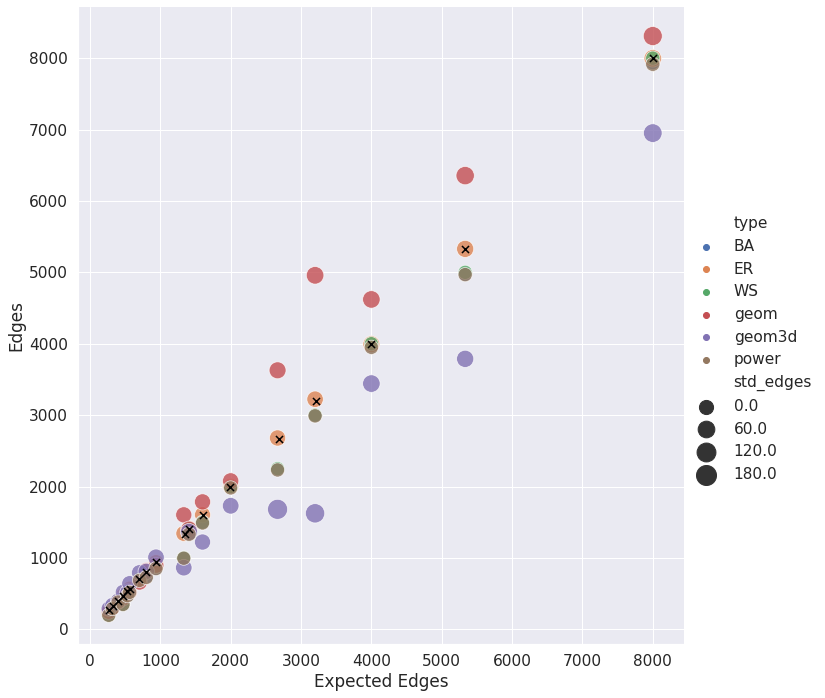

In [111]:
not_ref = data[data["type"] != "XREF"]
fg = sns.relplot(x = "Expected Edges", y = "Edges",size = "std_edges",kind = 'scatter',
                data = not_ref,sizes = (200,400),hue = "type",alpha=.8,height = 10,markers = mrkrs,
                facet_kws={'sharey': False, 'sharex': False})
ref = data[data["type"] == "XREF"]
fg.axes[0,0].scatter(ref["Edges"], ref["Expected Edges"],marker = 'x',c = 'black', s = 50)

In [36]:
x ='100N_0.345V/E'
to_expected(x)
#re.findall('\d+',x[0])

289.8550724637681

In [37]:
100/.345

289.8550724637681